# Assignment 5 #
### Due: Friday, November 17th to be submitted via Canvas by 11:59 pm ###
### Total points: **65** ###

**Group: 56**

Sanjhana Rangaraj (sr55737)

Santhosh Kumar Ramkumar (sr55965)

# Q1: Support Vector Machines (10 points)

In this question, we will explore support vector machines for the Spam Base dataset from the UCI repository.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
seed = 42

In [ ]:
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata


In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets
print("Abstract:", spambase.metadata['abstract'])
print("Number of instances:", spambase.metadata['num_instances'])
print("Number of features:", spambase.metadata['num_features'])
print(spambase.variables['name'])

Abstract: Classifying Email as Spam or Non-Spam
Number of instances: 4601
Number of features: 57
0                 word_freq_make
1              word_freq_address
2                  word_freq_all
3                   word_freq_3d
4                  word_freq_our
5                 word_freq_over
6               word_freq_remove
7             word_freq_internet
8                word_freq_order
9                 word_freq_mail
10             word_freq_receive
11                word_freq_will
12              word_freq_people
13              word_freq_report
14           word_freq_addresses
15                word_freq_free
16            word_freq_business
17               word_freq_email
18                 word_freq_you
19              word_freq_credit
20                word_freq_your
21                word_freq_font
22                 word_freq_000
23               word_freq_money
24                  word_freq_hp
25                 word_freq_hpl
26              word_freq_george
27          

In [ ]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [ ]:
seed = 42
y = y.to_numpy().squeeze()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

a. (5 points) Implement the following function to train SVMs with a specified kernel type, hyper-parameter search space, and random state on the Spam Base dataset. Do hyper-parameter search over $C$ using [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), setting the number of folds to 5. After finding the best C, please use it to train the final model and return both the final model and the best C.

In [ ]:
def search_best_svm(kernel, C_search_space, random_state):
    best_score = -np.inf
    best_C = None

    for C in C_search_space:
        # Initialize an SVM classifier with the specified kernel type, C value, and random state
        ### START CODE ###
        svm_classifier = SVC(kernel=kernel, C=C, random_state=random_state)
        ### END CODE ###

        # Evaluate accuracy scores using 5-fold cross-validation scores
        ### START CODE ###
        scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')
        ### END CODE ###

        # Compute the average score and compare with the current best score to update the best C
        ### START CODE ###
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_C = C
        ### END CODE ###
        print(f"C: {C} Avg Cross Val Score: {np.round(avg_score, 4)}")

    print(f"Best C: {best_C}")

    # Initialize the model using the specified kernel type, best C, and random state;
    # and then fit the model using training set
    ### START CODE ###
    model = SVC(kernel=kernel, C=best_C, random_state=random_state)
    model.fit(X_train, y_train)
    ### END CODE ###
    return model, best_C

b. (3 points) Run the function you implemented above to train SVMs with the search space of $C$ being [$0.1, 1, 10, 100$], random state set to 42, with the following three popular kernels: (i) linear (ii) polynomial (iii) RBF (Gaussian). Evaluate your final models on the test set and report their accuracies.

In [ ]:
C_values = [0.1, 1, 10, 100]

# Store results
results = {}

# Iterate over different kernel types
for kernel_type in ['linear', 'poly', 'rbf']:
    print(f"\nTraining SVM with {kernel_type} kernel:")

    # Run the search_best_svm function
    final_model, best_C = search_best_svm(kernel_type, C_values, seed)

    # Predict on the test set
    y_pred = final_model.predict(X_test)

    # Calculate and store the accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    results[kernel_type] = {'best_C': best_C, 'test_accuracy': test_accuracy}

    # Report the results
    print(f"Best C: {best_C}")
    print(f"Test Accuracy with {kernel_type} kernel: {test_accuracy:.4f}\n")

# Print the final results
print("\nFinal Results:")
for kernel_type, result in results.items():
    print(f"{kernel_type} kernel - Best C: {result['best_C']}, Test Accuracy: {result['test_accuracy']:.4f}")


Training SVM with linear kernel:
C: 0.1 Avg Cross Val Score: 0.9214
C: 1 Avg Cross Val Score: 0.9264
C: 10 Avg Cross Val Score: 0.9283
C: 100 Avg Cross Val Score: 0.9268
Best C: 10
Best C: 10
Test Accuracy with linear kernel: 0.9283


Training SVM with poly kernel:
C: 0.1 Avg Cross Val Score: 0.6895
C: 1 Avg Cross Val Score: 0.7594
C: 10 Avg Cross Val Score: 0.8428
C: 100 Avg Cross Val Score: 0.8957
Best C: 100
Best C: 100
Test Accuracy with poly kernel: 0.9125


Training SVM with rbf kernel:
C: 0.1 Avg Cross Val Score: 0.896
C: 1 Avg Cross Val Score: 0.9243
C: 10 Avg Cross Val Score: 0.9243
C: 100 Avg Cross Val Score: 0.9123
Best C: 10
Best C: 10
Test Accuracy with rbf kernel: 0.9354


Final Results:
linear kernel - Best C: 10, Test Accuracy: 0.9283
poly kernel - Best C: 100, Test Accuracy: 0.9125
rbf kernel - Best C: 10, Test Accuracy: 0.9354


c. (2 points) Train a logistic regression model using the training set. Compare its performance with that of the SVMs trained above.

In [ ]:
# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=seed)
logistic_model.fit(X_train, y_train)

# Evaluate on the test set
logistic_test_accuracy = logistic_model.score(X_test, y_test)

# Print the results
print(f"Logistic Regression Test Accuracy: {logistic_test_accuracy:.4f}\n")

# Compare with SVM results
print("Comparison with SVMs:")
for kernel_type, result in results.items():
    print(f"{kernel_type} kernel - SVM Test Accuracy: {result['test_accuracy']:.4f}")

Logistic Regression Test Accuracy: 0.9223

Comparison with SVMs:
linear kernel - SVM Test Accuracy: 0.9283
poly kernel - SVM Test Accuracy: 0.9125
rbf kernel - SVM Test Accuracy: 0.9354


 Logistic Regression achieved a test accuracy of 92.23%. Compared to the SVM models, Logistic Regression slightly underperformed the linear kernel SVM, which attained 92.83% accuracy, but outperformed the polynomial kernel model at 91.25%. The RBF kernel SVM achieved the top accuracy of 93.54%, indicating its nonlinear flexibility better captured patterns in the data versus the linear decision boundary of Logistic Regression. Overall, SVM with RBF kernel performed the best, marginally over Logistic regression.

# Question 2 : Ensemble Methods for Classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) classifiers.

We will look at the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset for this question. The dataset is extremely large so for this question we will only consider a subset which has been provided along with the notebook for this assignment. The dataset has already been split into train and test sets.

The task is to predict the probability that someone will experience financial distress in the next two years.

In [2]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving hw5_data.csv to hw5_data.csv


In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [4]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train:',X_train.shape, y_train.shape)
print('test:',X_test.shape, y_test.shape)

train: (3750, 10) (3750,)
test: (1250, 10) (1250,)


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost as xgb
%matplotlib inline

In [6]:
columns_list = list(X.columns)

a. (2.5 pts) Fit a Decision Tree Classifier with random_state = 14 for this classification problem. Report the accuracy_score and roc_auc_score on the test set.

In [7]:
def fit_classifier(clf):
  # Fit the classifier on the training set
  ### START CODE ###
  clf.fit(X_train, y_train)
  ### END CODE ###
  return clf

In [8]:
def evaluate_classifier(clf, X_test, y_test):
  # Compute the accuracy_score, and roc_auc_score on the test set
  ### START CODE ###
  y_pred = clf.predict(X_test)
  y_pred_proba = clf.predict_proba(X_test)[:, 1]

  acc_score = accuracy_score(y_test, y_pred)
  auc_score = roc_auc_score(y_test, y_pred_proba)
  ### END CODE ###
  print("Accuracy_score: {}, ROC_AUC_score: {}".format(acc_score, auc_score))
  return acc_score, auc_score

In [9]:
print("Decision Tree")
# Initialize your decision tree classifier
### START CODE ###
dt_clf = DecisionTreeClassifier(random_state=14)
### END CODE ###

dt_clf = fit_classifier(dt_clf)
acc_dt, roc_auc_dt = evaluate_classifier(dt_clf, X_test, y_test)

Decision Tree
Accuracy_score: 0.888, ROC_AUC_score: 0.5854582176218127


b. (2.5 pts) Create a [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) of 25 classifiers (i.e, n_estimators=25) with random_state=14. Please use Decision Tree Classifier with random_state=14 as the base classifier. Report accuracy_score and roc_auc_score on the test data for this emsemble classifier.

In [10]:
print("Bagging of Decesion Trees")
# Initialize your bagging classifier
### START CODE ###
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=14),
                            n_estimators=25,
                            random_state=14)
### END CODE ###

bag_clf = fit_classifier(bag_clf)
acc_bag, roc_auc_bag = evaluate_classifier(bag_clf, X_test, y_test)

Bagging of Decesion Trees
Accuracy_score: 0.9256, ROC_AUC_score: 0.7857106791214341


c. (5 pts) In this question, you will fit a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model on the training data for this classification task.

1. First, please find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch.
2. Fit a model using the best parameters, and report the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data.

In [11]:
def grid_search_for_classifier(clf, param_grid, X_train, y_train):
  # Grid search
  grid_search = GridSearchCV(clf, param_grid=param_grid)

  # Conduct grid search using the training set (1 line of code only)
  ### START CODE ###
  grid_search.fit(X_train, y_train)
  ### END CODE ###
  print(grid_search.best_params_)

  # Set the best paramters for your clf (1 line of code only)
  ### START CODE ###
  clf.set_params(**grid_search.best_params_)
  ### END CODE ###
  return clf

In [12]:
def train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test):
  t0 = time()
  # Fit your classifier on the training set
  ### START CODE ###
  clf.fit(X_train, y_train)
  ### END CODE ###
  print("training time", round(time()-t0, 3), "s")

  t0 = time()
  y_pred = clf.predict(X_test)
  print("predict time", round(time()-t0, 3), "s")

  print("Confusion matrix: ")
  # Print the confusion matrix computed from the test set (1 line of code only)
  ### START CODE ###
  print(confusion_matrix(y_test, y_pred))
  ### END CODE ###


  ### START CODE ###
  y_pred_proba = clf.predict_proba(X_test)[:, 1]
  acc_score = accuracy_score(y_test, y_pred)
  auc_score = roc_auc_score(y_test, y_pred_proba)
  ### END CODE ###

  print("Accuracy: {}, AUC_ROC: {}".format(acc_score, auc_score))
  return clf, acc_score, auc_score

In [13]:
param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Initialize your random forest classifier
### START CODE ###
rf_clf = RandomForestClassifier()
### END CODE ###
rf_clf = grid_search_for_classifier(rf_clf, param_grid, X_train, y_train)
rf_clf_1, acc_rf, roc_auc_rf = train_and_evaluate_classifier(rf_clf, X_train, y_train, X_test, y_test)

{'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}
training time 0.655 s
predict time 0.032 s
Confusion matrix: 
[[1162    3]
 [  82    3]]
Accuracy: 0.932, AUC_ROC: 0.8375612219136582


d. (10 pts) This time, let us use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) and [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) for the same task. For AdaBoost and XGBoost, please respectively find the best parameters (including *n_estimators, learning_rate*); fit your model using the best parameters, and report the confusion matrix and roc_auc_score on test data.

In [14]:
param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

In [15]:
# Initialize your AdaBoost classifier
### START CODE ###
ab_clf = AdaBoostClassifier()
### END CODE ###
ab_clf = grid_search_for_classifier(ab_clf, param_grid, X_train, y_train)
ab_clf_1, acc_ab, roc_auc_ab = train_and_evaluate_classifier(ab_clf, X_train, y_train, X_test, y_test)

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.462 s
predict time 0.034 s
Confusion matrix: 
[[1153   12]
 [  72   13]]
Accuracy: 0.9328, AUC_ROC: 0.8390254986114618


In [17]:
# Initialize your XGBoost classifier
### START CODE ###
xgb_clf = xgb.XGBClassifier()
### END CODE ###
xgb_clf = grid_search_for_classifier(xgb_clf, param_grid, X_train, y_train)
xgb_clf_1, acc_xgb, roc_auc_xgb = train_and_evaluate_classifier(xgb_clf, X_train, y_train, X_test, y_test)

{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.133 s
predict time 0.006 s
Confusion matrix: 
[[1163    2]
 [  84    1]]
Accuracy: 0.9312, AUC_ROC: 0.8267962635698057


f. (5 pts) Compare the performance of decision tree from part a) with the ensemble methods. Briefly explain which of the three ensemble methods performed better and why?

In [18]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Classifier", "Accuracy", "ROC AUC"]
table.add_row(["Decision Tree", acc_dt, roc_auc_dt])
table.add_row(["Bagging", acc_bag, roc_auc_bag])
table.add_row(["Random Forest", acc_rf, roc_auc_rf])
table.add_row(["AdaBoost", acc_ab, roc_auc_ab])
table.add_row(["XGBoost", acc_xgb, roc_auc_xgb])
print(table)

+---------------+----------+--------------------+
|   Classifier  | Accuracy |      ROC AUC       |
+---------------+----------+--------------------+
| Decision Tree |  0.888   | 0.5854582176218127 |
|    Bagging    |  0.9256  | 0.7857106791214341 |
| Random Forest |  0.932   | 0.8375612219136582 |
|    AdaBoost   |  0.9328  | 0.8390254986114618 |
|    XGBoost    |  0.9312  | 0.8267962635698057 |
+---------------+----------+--------------------+


The decision tree classifier had significantly lower performance compared to the ensemble methods, with an accuracy of 0.888 and ROC AUC of 0.585. This is likely because decision tree tend to overfit training data, has high variance, is not stable, and the greedy recursive splitting approach. All these contribute to poorer performance compared to ensemble methods which address these weaknesses.

Among the ensemble methods, AdaBoost achieved the highest test accuracy of 0.9328 and ROC AUC of 0.8390.

AdaBoost works by combining multiple weak decision tree models sequentially, with each new model focusing on correcting errors from the previous ones. This allows AdaBoost to reduce both bias and variance in the final model, leading to better performance.

# Q3: CatBoost (10 points)

In this question you will learn about a boosting algorithm known as **CatBoost**. Please go through the two videos specified below to get a better understanding of the CatBoost algorithm and answer the questions that follow.

[Part-1](https://www.youtube.com/watch?v=KXOTSkPL2X4&ab_channel=StatQuestwithJoshStarmer)
[Part - 2](https://www.youtube.com/watch?v=3Bg2XRFOTzg&t=242s&ab_channel=StatQuestwithJoshStarmer)



a. **(5 points)** Briefly explain Ordered Target Encoding. What challenge does it try to address?

b. **(5 points)** Briefly describe the main advantages and disadvantages of CatBoost as compared to XGBoost.

a. Ordered Target Encoding is a method used by CatBoost to encode categorical features in a way that preserves information about the relationship with the target variable. Unlike one-hot encoding which creates binary indicator variables, Ordered Target Encoding assigns numerical values to categories based on the probability of the target variable being 1 for observations with that category.

Specifically, for each category in a categorical feature, the probability of the target being 1 is calculated using only prior observations in the training data. This avoids leakage from the full dataset. The categories are then sorted based on these probabilities and assigned numerical values in order. This encoding method efficiently captures information about the correlation between a categorical feature and the target, while avoiding sparse high-dimensional representations. A key advantage is that it accounts for the target variable information during encoding, unlike one-hot encoding. By ordering categories intelligently based on the target variable, Ordered Target Encoding provides a meaningful representation of categorical variables for boosted decision tree models like CatBoost.

b.


 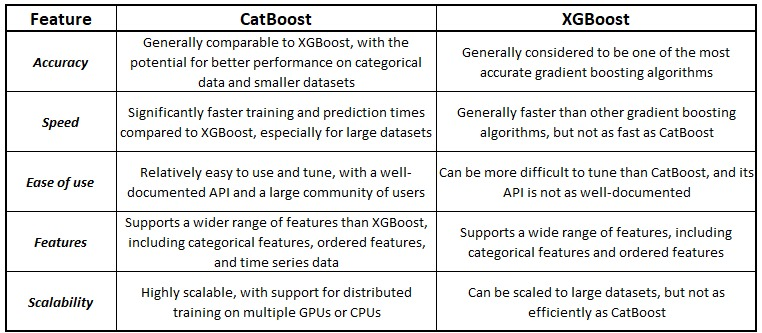

# Q4: Convolutional Neural Network (20 points)
In this question, we will continue our exercise on the SVHN classification task from the previous homework, but this time we will be using Convolutional Neural Networks.

In [20]:
import numpy as np
import random
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [21]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [22]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
        ])

train_dataset = torchvision.datasets.SVHN(root='.', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.SVHN(root='.', split='test', transform=transform, download=True)

100%|██████████| 182040794/182040794 [00:23<00:00, 7888704.32it/s] 


100%|██████████| 64275384/64275384 [00:11<00:00, 5403153.28it/s]


In [23]:
train_num = int(len(train_dataset) * 0.8)
val_num = len(train_dataset) - train_num
# Randomly split the training dataset into training dataset and validation dataset
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_num, val_num])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

a. (10 points) Build a convolutional neural network with the following sequential configuration. If not specified, please use the default setting of torch.nn.Conv2d. The output of the convolution layers will be fed into a fully-connected MLP. Then train the model with Adam optimizer (lr=1e-3) for 10 epochs. You should be able to achieve test accuracy of over 85%.



> Layer 1
*   2d convolution (# input channel=3, # output channel=16, kernel size=3, padding=1)
*   2d batch normalization
*   Relu activation

> Pool 1
*   2d max pooling (kernel size=2)

> Layer 2
*   2d convolution (# output channel=16, kernel size=3, padding=1)
*   2d batch normalization
*   Relu activation

> Pool 2
*   2d max pooling (kernel size=2)

> Layer 3
*   2d convolution (# output channel=32, kernel size=3, padding=1)
*   2d batch normalization
*   Relu activation

> Pool 3
*   2d max pooling (kernel size=2)

References:

*   https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
*   https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
*   https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
*   https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html






In [24]:
class CNN(nn.Module):
    def __init__(self, pool=True):
        super(CNN, self).__init__()
        self.pool = pool

        # Create convolutional layers
        ### START CODE ###
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )

        self.pool3 = nn.MaxPool2d(kernel_size=2)
        ### END CODE ###

        # Create fully connected layers (nn.Linear)
        if self.pool:
            self.mlp1 = nn.Linear(32*4*4, 50)
        else:
            self.mlp1 = nn.Linear(32*32*32, 50)

        self.mlp2 = nn.Linear(50, 50)
        self.mlp3 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.layer1(x)
        if self.pool:
            x = self.pool1(x)

        x = self.layer2(x)
        if self.pool:
            x = self.pool2(x)

        x = self.layer3(x)
        if self.pool:
            x = self.pool3(x)
        x = x.reshape(x.shape[0], -1)

        x = F.relu(self.mlp1(x))
        x = F.relu(self.mlp2(x))
        x = self.mlp3(x)

        return x

In [25]:
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        loss = F.nll_loss(F.log_softmax(out, dim=1), target)

        # Use the optimizer to perform backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    return avg_loss

@torch.no_grad()
def eval(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        loss = F.nll_loss(F.log_softmax(out, dim=1), target)

        # Get model's prediction
        pred = torch.argmax(out, dim=1)

        # Count number of correct predictions
        correct = accuracy_score(target, pred, normalize=False)

        total_correct += correct
        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    acc = total_correct / total_num
    return avg_loss, acc

In [26]:
model1 = CNN(pool=True)
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-3)
best_acc = -np.inf
epochs = 10
for e in range(1, epochs + 1):
    train_loss = train(model1, train_loader, optimizer)
    val_loss, val_acc = eval(model1, val_loader)
    if val_acc > best_acc:
        best_acc = val_acc
        best_model1 = model1
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

100%|██████████| 58/58 [00:10<00:00,  5.71it/s]


Epoch: 1 Train Loss: 1.22839825788198 Val Loss: 0.647812260749592 Val Acc: 0.8073983073983074


100%|██████████| 58/58 [00:09<00:00,  5.91it/s]


Epoch: 2 Train Loss: 0.5592806533471013 Val Loss: 0.5003044925001583 Val Acc: 0.8536718536718537


100%|██████████| 58/58 [00:09<00:00,  6.34it/s]


Epoch: 3 Train Loss: 0.4593943901105135 Val Loss: 0.4746085552693455 Val Acc: 0.8582446082446082


100%|██████████| 58/58 [00:08<00:00,  6.57it/s]


Epoch: 4 Train Loss: 0.41120777591565866 Val Loss: 0.42906942453877117 Val Acc: 0.8735326235326235


100%|██████████| 58/58 [00:09<00:00,  6.44it/s]


Epoch: 5 Train Loss: 0.376636562444236 Val Loss: 0.407136069334598 Val Acc: 0.881040131040131


100%|██████████| 58/58 [00:09<00:00,  6.15it/s]


Epoch: 6 Train Loss: 0.3525809457883647 Val Loss: 0.4136648689206754 Val Acc: 0.8751706251706252


100%|██████████| 58/58 [00:09<00:00,  5.89it/s]


Epoch: 7 Train Loss: 0.33502779737103466 Val Loss: 0.3914568663871975 Val Acc: 0.8840431340431341


100%|██████████| 58/58 [00:10<00:00,  5.71it/s]


Epoch: 8 Train Loss: 0.31703089203619733 Val Loss: 0.3720417320687622 Val Acc: 0.8904586404586404


100%|██████████| 58/58 [00:10<00:00,  5.68it/s]


Epoch: 9 Train Loss: 0.3009738132185969 Val Loss: 0.3756331554648331 Val Acc: 0.8910728910728911


100%|██████████| 58/58 [00:10<00:00,  5.72it/s]

Epoch: 10 Train Loss: 0.29225769216071906 Val Loss: 0.37330560991502415 Val Acc: 0.891960141960142


In [27]:
_, test_acc = eval(best_model1, test_loader)
print(f"Test accuracy: {np.round(test_acc, 3)}")

100%|██████████| 102/102 [00:32<00:00,  3.19it/s]

Test accuracy: 0.889


b. (5 points) Use torch-summary to print a summary of the model. The number of parameters should be less than the one of the MLP we trained in the previous homework. Why does it have less number of parameters but have higher accuracy?

Reference
*   https://pypi.org/project/torch-summary/


In [28]:
from torchsummary import summary

#summary(best_model1)
summary(best_model1, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
         MaxPool2d-4           [-1, 16, 16, 16]               0
            Conv2d-5           [-1, 16, 16, 16]           2,320
       BatchNorm2d-6           [-1, 16, 16, 16]              32
              ReLU-7           [-1, 16, 16, 16]               0
         MaxPool2d-8             [-1, 16, 8, 8]               0
            Conv2d-9             [-1, 32, 8, 8]           4,640
      BatchNorm2d-10             [-1, 32, 8, 8]              64
             ReLU-11             [-1, 32, 8, 8]               0
        MaxPool2d-12             [-1, 32, 4, 4]               0
           Linear-13                   [-1, 50]          25,650
           Linear-14                   


The convolutional neural network (CNN) model has significantly fewer parameters compared to the multi-layer perceptron (MLP) model from the previous assignment. However, the CNN achieves higher accuracy on the image classification task. This is due to the inherent efficiency of CNN architectures for visual recognition problems.


A key advantage of CNNs is their use of convolutional filters that are convolved across the image to detect patterns and features. The same filter weights are shared across the entire image, greatly reducing the number of learnable parameters. On the other hand, the MLP model has no weight sharing and learns a separate weight for each input pixel, resulting in a much larger parameter size.


Additionally, CNNs capture spatial relationships between neighboring pixels through the convolutional operations. This allows meaningful representations to be learned from images. In contrast, the MLP treats each pixel independently and lacks the ability to discern spatial patterns. By leveraging filters and localization, CNNs can learn effective features for images using far fewer parameters compared to perceptron models. This combination of specialized architecture and parameter sharing enables CNNs to achieve superior accuracy and efficiency on computer vision tasks.



c. (5 points) Train another CNN with the pool option set to False. What are the differences in terms of accuracy or computation caused by disabling max pooling? What are the effects of pooling operations in CNNs? (This might take some time. Watch a TV show while you're waiting for the results..)

In [29]:
model2 = CNN(pool=False)
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)
best_acc = -np.inf
epochs = 10
for e in range(1, epochs + 1):
    train_loss = train(model2, train_loader, optimizer)
    val_loss, val_acc = eval(model2, val_loader)
    if val_acc > best_acc:
        best_acc = val_acc
        best_model2 = model2
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

100%|██████████| 58/58 [00:14<00:00,  3.90it/s]


Epoch: 1 Train Loss: 1.0003158025688283 Val Loss: 0.5584160293382014 Val Acc: 0.834971334971335


100%|██████████| 58/58 [00:15<00:00,  3.86it/s]


Epoch: 2 Train Loss: 0.5144349020258293 Val Loss: 0.5235431071369823 Val Acc: 0.8423423423423423


100%|██████████| 58/58 [00:14<00:00,  4.00it/s]


Epoch: 3 Train Loss: 0.4271723176124875 Val Loss: 0.4624150771929402 Val Acc: 0.8622713622713623


100%|██████████| 58/58 [00:14<00:00,  3.94it/s]


Epoch: 4 Train Loss: 0.3739251923626188 Val Loss: 0.4183060463549431 Val Acc: 0.8771498771498771


100%|██████████| 58/58 [00:13<00:00,  4.14it/s]


Epoch: 5 Train Loss: 0.33857445641188844 Val Loss: 0.4171803383278189 Val Acc: 0.8751706251706252


100%|██████████| 58/58 [00:13<00:00,  4.21it/s]


Epoch: 6 Train Loss: 0.3040421285408368 Val Loss: 0.41760880691885394 Val Acc: 0.8756483756483756


100%|██████████| 58/58 [00:13<00:00,  4.18it/s]


Epoch: 7 Train Loss: 0.273628866745744 Val Loss: 0.4462313714360657 Val Acc: 0.8705978705978706


100%|██████████| 58/58 [00:14<00:00,  3.90it/s]


Epoch: 8 Train Loss: 0.2568227009448406 Val Loss: 0.4360978120366895 Val Acc: 0.8753071253071253


100%|██████████| 58/58 [00:14<00:00,  4.12it/s]


Epoch: 9 Train Loss: 0.23452540480554557 Val Loss: 0.43030886398030865 Val Acc: 0.8798116298116299


100%|██████████| 58/58 [00:13<00:00,  4.16it/s]

Epoch: 10 Train Loss: 0.21008999816931592 Val Loss: 0.43881489194109896 Val Acc: 0.88001638001638


In [30]:
_, test_acc = eval(best_model2, test_loader)
print(test_acc)

100%|██████████| 102/102 [00:23<00:00,  4.26it/s]

0.8660110633066994


In [31]:
summary(best_model2, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,320
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 32, 32, 32]           4,640
       BatchNorm2d-8           [-1, 32, 32, 32]              64
              ReLU-9           [-1, 32, 32, 32]               0
           Linear-10                   [-1, 50]       1,638,450
           Linear-11                   [-1, 50]           2,550
           Linear-12                   [-1, 10]             510
Total params: 1,649,046
Trainable params: 1,649,046
Non-trainable params: 0
---------------------------

The inclusion of max pooling layers led to noticeably better test accuracy compared to removing them from the CNN architecture. With max pooling, the model achieved a test accuracy of 0.889 versus 0.866 without pooling. Removing the max-pooling layer led to a significant rise in the parameter count, soaring from 36,246 to 1,649,046—a 45-fold increase. Consequently, the training duration for the model substantially extended compared to the previous configuration.

Max pooling provides two key benefits - dimensionality reduction and translation invariance. By downsampling the feature maps, max pooling reduces computational complexity and acts as a form of regularization to prevent overfitting. Additionally, taking the maximum value in each window promotes invariance to the exact location of features. This allows the model to focus on the presence of key features rather than their precise spatial locations. However, some detailed spatial information is lost. Overall, the regularization and robustness provided by max pooling likely helped the model generalize better to the test data, overcoming the potential loss of fine-grained spatial details.

In contrast, the lack of pooling retains more spatial information but loses the benefits of downsampling and invariance. This can lead to oversensitivity to minor input variations. The model may also be more prone to overfitting without the regularization induced by pooling layers. In summary, max pooling provides helpful inductive biases for many computer vision tasks, leading to noticeable improvements in accuracy and efficiency.